# Random Forest

### Setup

In [2]:
#imports
# load needed libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import json


# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc, precision_score, recall_score
# Added this to simulate bootstrapped sampeles in the "Manual" Random Forest
from sklearn.utils import resample

# sklearn models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/Final Project/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['LogisticRegression.ipynb', 'fakeAccountData.json', 'realAccountData.json', 'RandomForest.ipynb']


In [5]:
#setting a random seed for reproducibility
random.seed(4)

In [6]:
#getting the data
realData = pd.read_json(GOOGLE_DRIVE_PATH + 'realAccountData.json')
fakeData = pd.read_json(GOOGLE_DRIVE_PATH + 'fakeAccountData.json')

allData = pd.concat([realData, fakeData], ignore_index=True)

In [7]:
# allData[1] #making sure the combination works

In [8]:
#making sure the data came in correctly
# fakeData[0], realData[0]
# realData[1]

In [9]:
#turning into numpy arrays
numpy_real = np.array(realData)
# print(numpy_real[1]) #making sure things work
numpy_fake = np.array(fakeData)
# print(numpy_fake[1]) #making sure things work
numpy_all = np.array(allData)
# print(numpy_all[1]) #making sure things work


# Random Forest

In [10]:
num_cols = allData.shape[1]
X = allData.iloc[:,0:num_cols-1] # iloc slicing function
Y = allData.iloc[:,num_cols-1:num_cols]
Y = np.ravel(Y)

display(allData)

,userFollowerCount,userFollowingCount,userBiographyLength,userMediaCount,userHasProfilPic,userIsPrivate,usernameDigitCount,usernameLength,isFake
0,258,238,0,0,1,0,0,10,0
1,263,482,30,29,1,1,0,8,0
2,51,78,9,0,1,1,0,10,0
3,297,480,22,25,1,1,2,9,0
4,113,242,0,95,1,1,0,10,0
...,...,...,...,...,...,...,...,...,...
1189,0,25,138,6,1,0,0,10,1
1190,0,0,52,6,1,0,3,7,1
1191,0,1,92,9,1,0,1,15,1
1192,1,0,60,5,1,0,1,13,1


In [11]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4)

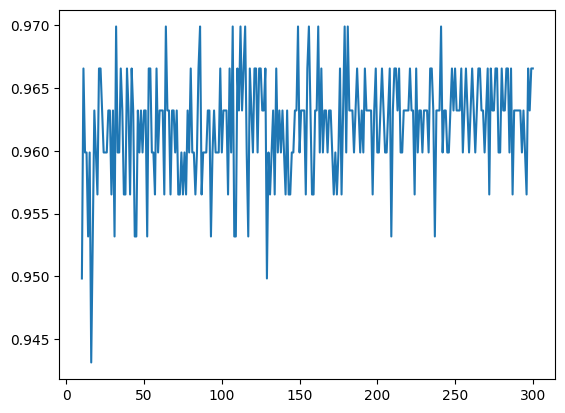

In [12]:
forest_scores = []
for i in range(10, 301):
    random_forest = RandomForestClassifier(n_estimators=i)
    forest_fit = random_forest.fit(x_train, y_train)
    forest_score = forest_fit.score(x_test, y_test)
    forest_scores.append(forest_score)

x =list(range(10, 301))
y = forest_scores

plt.plot(x, y)
plt.show()

In [13]:
final_rf = RandomForestClassifier(random_state=4)
final_rf_fit = final_rf.fit(x_train, y_train)
final_rf_score = final_rf_fit.score(x_test, y_test)
print(final_rf_score)

0.9665551839464883


In [14]:
#function that you will use to convert confusion matrix to dataframe, useful for visulization.
def conf_matrix_to_df(conf_matrix, target_names):
    return pd.DataFrame(conf_matrix, columns=target_names, index=target_names)

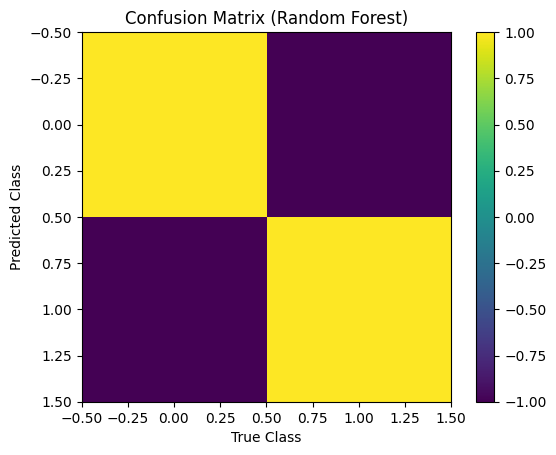

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       257
           1       0.83      0.95      0.89        42

    accuracy                           0.97       299
   macro avg       0.91      0.96      0.93       299
weighted avg       0.97      0.97      0.97       299



In [15]:
# Model Results
from sklearn.preprocessing import StandardScaler

y_test_array = np.ravel(y_test)
rf_predicted = final_rf.predict(X = x_test)

conf_matrix = confusion_matrix(y_true = y_test, y_pred = rf_predicted)
conf_matrix_scaler = StandardScaler().fit(conf_matrix)
conf_matrix_scaled = conf_matrix_scaler.transform(conf_matrix)


# the closer to 1, the more that there is
# the closer to -1 the less that there is
plt.title('Confusion Matrix (Random Forest)')
plt.imshow(conf_matrix_scaled)
plt.colorbar()
plt.xlabel("True Class")
plt.ylabel("Predicted Class")
plt.show()

rf_classification_report = classification_report(y_true = y_test, y_pred = rf_predicted)
print(rf_classification_report)

In [16]:
# Classification Report (Manual)
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
print(f"specificity: {specificity}")
recall = tp / (tp + fn)
print(f"recall: {recall}")
precision = tp / (tp + fp)
print(f"precision: {precision}")
accuracy = (tp + tn)/(tp+tn+fn+fp)
print(f"accuracy: {accuracy}")

specificity: 0.9688715953307393
recall: 0.9523809523809523
precision: 0.8333333333333334
accuracy: 0.9665551839464883


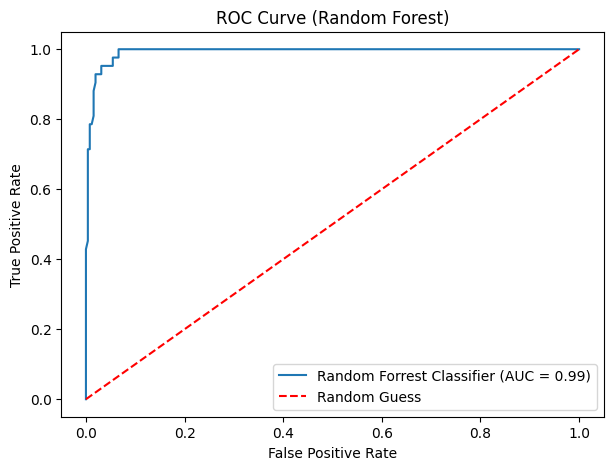

Random Forrest Classifier ROC-AUC: 0.992449508986474


In [19]:
# ROC Curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
# other option for how things could work
y_score = final_rf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
rf_roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'Random Forrest Classifier (AUC = {rf_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend()
plt.show()

print(f"Random Forrest Classifier ROC-AUC: {rf_roc_auc}")


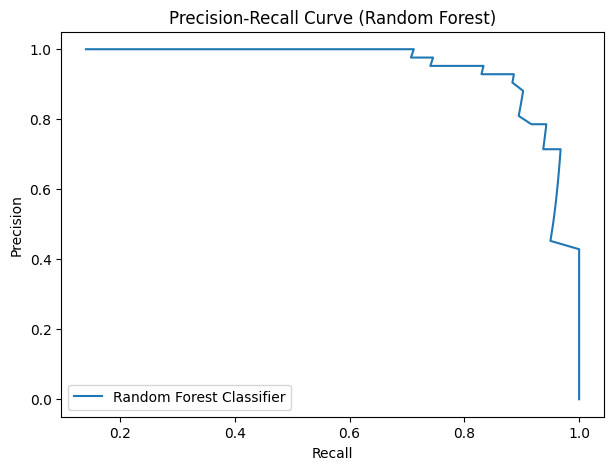

Random Forrest Classifier Precision: 0.8333333333333334
Random Forrest Classifier Recall: 0.9523809523809523


In [20]:
# Precision-Recall Curve
y_score = final_rf.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_score)
rf_precision_score = precision_score(y_test, rf_predicted)
rf_recall_score = recall_score(y_test, rf_predicted)

plt.figure(figsize=(7, 5))
plt.plot(precision, recall, label=f'Random Forest Classifier')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Random Forest)')
plt.legend()
plt.show()

print(f"Random Forrest Classifier Precision: {rf_precision_score}")
print(f"Random Forrest Classifier Recall: {rf_recall_score}")
